## EMAIL SPAM DETECTION WITH MACHINE LEARNING

## Introduction
Email spam detection is a common application of machine learning and natural language processing (NLP). The goal of this project is to build a model that can classify emails as either spam or ham (not spam). We'll use a dataset containing labeled email data to train a machine learning model and then evaluate its performance.

## Import Necessary Libraries
We begin by importing the required libraries for data manipulation, visualization, and model building.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Load and Inspect Data
We load the dataset and inspect its structure to understand the data we're working with.

In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\mpara\Intern Projects\spam.csv", encoding='latin-1')

# Display the first few rows
print(df.head())

# Display basic dataset information
print(df.info())
print(df.describe())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

## Data Preprocessing
We preprocess the data by selecting relevant columns, encoding labels, and handling missing values.

label    0
text     0
dtype: int64


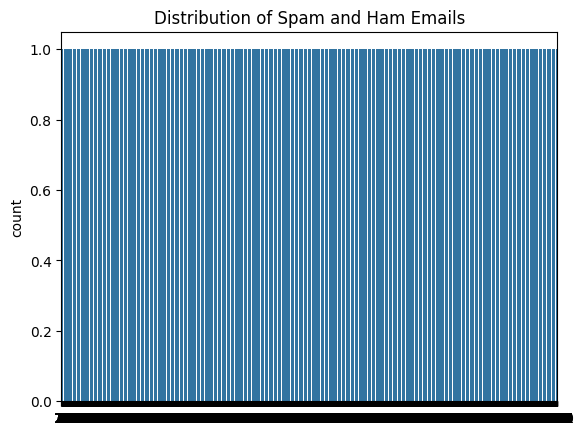

In [6]:
# Keep only necessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Encode labels: ham -> 0, spam -> 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check for missing values
print(df.isnull().sum())

# Display the distribution of labels
sns.countplot(df['label'])
plt.title('Distribution of Spam and Ham Emails')
plt.show()


## Feature Extraction
We extract features from the text data using the CountVectorizer to convert the text into numerical features.

python

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)


## Model Training and Evaluation
We train a Naive Bayes classifier model and evaluate its performance using accuracy, classification report, and confusion matrix.

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



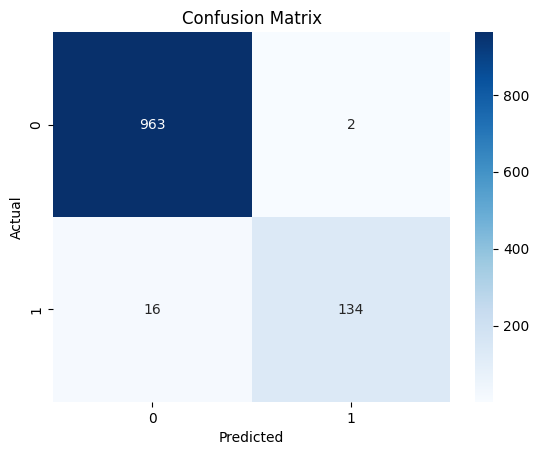

In [8]:
# Initialize the model
model = MultinomialNB()

# Train the model
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Model Testing
We can test the trained model on new email samples to see how it performs.

In [13]:
# Define new email samples
new_emails = [ """Dear user, Congratulations! You have been selected as the lucky winner of a $1,000 gift card. To claim your prize, please click on the link below and fill out the necessary details. [Claim your gift card now](http://fakeurl.com) Hurry! This offer is valid for a limited time only. Best regards, The Rewards Team""",

              "Can we schedule a meeting for tomorrow to discuss the project updates?"]



In [14]:
# Transform the new email samples
new_emails_vec = vectorizer.transform(new_emails)

# Predict the labels
predictions = model.predict(new_emails_vec)

# Display the predictions
for email, label in zip(new_emails, predictions):
    print(f'Email: "{email}" -> Prediction: {"Spam" if label == 1 else "Ham"}')


Email: "Dear user, Congratulations! You have been selected as the lucky winner of a $1,000 gift card. To claim your prize, please click on the link below and fill out the necessary details. [Claim your gift card now](http://fakeurl.com) Hurry! This offer is valid for a limited time only. Best regards, The Rewards Team" -> Prediction: Spam
Email: "Can we schedule a meeting for tomorrow to discuss the project updates?" -> Prediction: Ham
